In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
%matplotlib inline

In [3]:
plt.style.use('court.mplstyle')

# Convenience Functions

In [4]:
def load_profile(profile_number, logs_dir):
    prof = pd.read_table(
        os.path.join(logs_dir, 'profile' + str(profile_number) + '.data'), 
        skiprows=5, sep='\s+')
    return prof

In [5]:
def get_index(logs_dir):
    return pd.read_table(os.path.join(logs_dir, 'profiles.index'), 
        names=['model_number', 'priority', 'profile_number'],
        skiprows=1, sep='\s+')

In [6]:
def load_history_file(logs_dir):
    return pd.read_table(os.path.join(logs_dir, 'history.data'),
                         skiprows=5, sep='\s+')

# Comparing adding the atmosphere

In [7]:
atm_logs_dir = os.path.join('/Users/ccra8514/Desktop/highmassRG_test/w_atm_res/', 'LOGS')
atm_logs_dir

'/Users/ccra8514/Desktop/highmassRG_test/w_atm_res/LOGS'

In [8]:
atm_hist = load_history_file(atm_logs_dir)
atm_hist = atm_hist[atm_hist['star_age']>1e4]
atm_hist

,model_number,num_zones,star_age,log_dt,star_mass,log_xmstar,log_abs_mdot,mass_conv_core,conv_mx1_top,conv_mx1_bot,...,surface_c12,surface_o16,total_mass_h1,total_mass_he4,rel_E_err,log_rel_E_err,log_rel_run_E_err,num_retries,num_iters,num_solver_iterations
52,106,653,1.236466e+04,3.314031,4.999996,33.997476,-9.610214,0.0,1.000000,0.149833,...,0.003447,0.009359,3.499997,1.399850,3.569135e-13,-12.447437,-10.548664,0,5,5
53,108,658,1.751232e+04,3.427280,4.999995,33.997475,-9.688761,0.0,1.000000,0.203006,...,0.003447,0.009359,3.499996,1.399850,3.541477e-13,-12.450816,-10.573197,0,5,5
54,110,663,2.301792e+04,3.472407,4.999994,33.997475,-9.763289,0.0,1.000000,0.260052,...,0.003447,0.009359,3.499996,1.399849,3.459944e-13,-12.460931,-10.593352,0,5,5
55,112,671,2.953799e+04,3.503331,4.999993,33.997475,-9.837238,0.0,1.000000,0.320274,...,0.003447,0.009359,3.499995,1.399849,3.266484e-13,-12.485920,-10.613372,0,5,5
56,114,676,3.755266e+04,3.628255,4.999992,33.997475,-9.904546,0.0,1.000000,0.379401,...,0.003447,0.009359,3.499994,1.399849,3.286651e-13,-12.483246,-10.634125,0,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,738,1661,1.152834e+08,3.447527,4.944003,33.992585,-9.293814,0.0,0.999734,0.214807,...,0.002208,0.008554,2.597134,1.513350,2.049969e-13,-12.688253,-7.188025,13,8,8
369,740,1668,1.152887e+08,3.413419,4.944000,33.992584,-9.250635,0.0,0.999723,0.210059,...,0.002208,0.008554,2.597132,1.509595,2.098361e-13,-12.678120,-7.197311,13,8,8
370,742,1683,1.152933e+08,3.341891,4.943998,33.992584,-9.209779,0.0,0.999705,0.204741,...,0.002208,0.008554,2.597130,1.506256,2.355371e-13,-12.627941,-7.205757,13,9,9
371,744,1685,1.152971e+08,3.257510,4.943995,33.992584,-9.172476,0.0,0.999689,0.200166,...,0.002208,0.008554,2.597129,1.503467,4.464467e-13,-12.350230,-7.212983,13,10,10


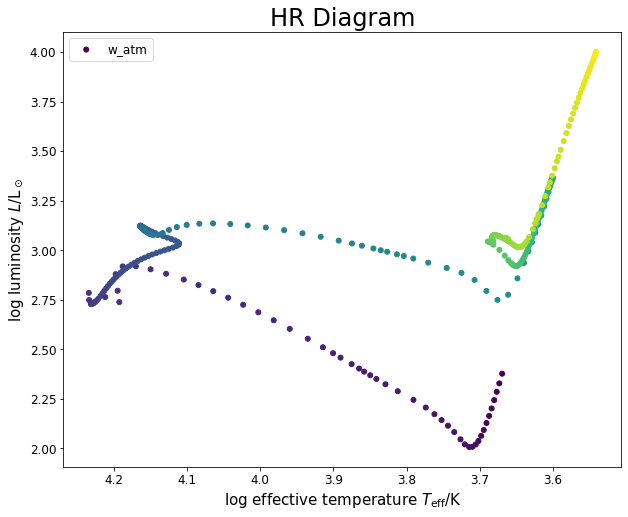

In [9]:
plt.scatter(atm_hist['log_Teff'],#[100:], 
         atm_hist['log_L'],#[100:], 
         lw=1, c=atm_hist['model_number'],cmap='viridis', marker='o', label='w_atm')

plt.gca().invert_xaxis()
plt.xlabel(r'log effective temperature $T_{\rm{eff}}/\rm{K}$')
plt.ylabel(r'log luminosity $L/\rm{L}_\odot$')
# plt.xlim(left=5000)

# plt.xscale('log')
# plt.yscale('log')

plt.legend()
plt.title('HR Diagram', size=24)
plt.show()

In [10]:
no_atm_logs_dir = os.path.join('/Users/ccra8514/Desktop/highmassRG_test/no_atm_res/', 'LOGS')
no_atm_logs_dir

'/Users/ccra8514/Desktop/highmassRG_test/no_atm_res/LOGS'

In [11]:
no_atm_hist = load_history_file(no_atm_logs_dir)
no_atm_hist = no_atm_hist[no_atm_hist['star_age']>1e4]
no_atm_hist

,model_number,num_zones,star_age,log_dt,star_mass,log_xmstar,log_abs_mdot,mass_conv_core,conv_mx1_top,conv_mx1_bot,...,surface_c12,surface_o16,total_mass_h1,total_mass_he4,rel_E_err,log_rel_E_err,log_rel_run_E_err,num_retries,num_iters,num_solver_iterations
53,106,592,1.236466e+04,3.314031,4.999996,33.997476,-9.610343,0.0,1.000000,0.149858,...,0.003447,0.009359,3.499997,1.399850,3.454104e-13,-12.461665,-10.551953,0,5,5
54,108,596,1.748627e+04,3.423030,4.999995,33.997475,-9.688858,0.0,1.000000,0.203045,...,0.003447,0.009359,3.499996,1.399850,3.525626e-13,-12.452764,-10.576068,0,5,5
55,110,599,2.294091e+04,3.466822,4.999994,33.997475,-9.762731,0.0,1.000000,0.259666,...,0.003447,0.009359,3.499996,1.399849,3.376853e-13,-12.471488,-10.596576,0,5,5
56,112,602,2.937403e+04,3.499102,4.999993,33.997475,-9.835961,0.0,1.000000,0.319219,...,0.003447,0.009359,3.499995,1.399849,3.288086e-13,-12.483057,-10.616118,0,5,5
57,114,606,3.723802e+04,3.619214,4.999992,33.997475,-9.902711,0.0,1.000000,0.377708,...,0.003447,0.009359,3.499994,1.399849,3.124086e-13,-12.505277,-10.636705,0,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,718,1545,1.152618e+08,3.439659,4.943913,33.992577,-9.282886,0.0,0.999996,0.214258,...,0.002147,0.008465,2.597087,1.511916,2.113038e-13,-12.675093,-7.239233,1,9,9
360,720,1566,1.152668e+08,3.381155,4.943910,33.992576,-9.240952,0.0,0.999994,0.209363,...,0.002135,0.008414,2.597085,1.508340,2.057934e-13,-12.686569,-7.248125,1,9,9
361,722,1585,1.152708e+08,3.269772,4.943908,33.992576,-9.205980,0.0,0.999994,0.204256,...,0.002122,0.008362,2.597084,1.505454,9.323929e-13,-12.030401,-7.255433,1,10,10
362,724,1578,1.152739e+08,3.174166,4.943906,33.992576,-9.176712,0.0,0.999990,0.200053,...,0.002112,0.008320,2.597082,1.503144,2.830853e-12,-11.548083,-7.261379,1,10,10


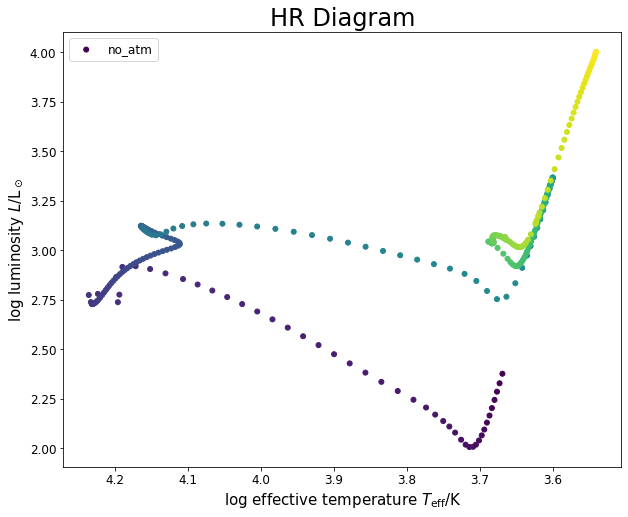

In [12]:
plt.scatter(no_atm_hist['log_Teff'],#[100:], 
         no_atm_hist['log_L'],#[100:], 
         lw=1, c=no_atm_hist['model_number'],cmap='viridis', marker='o', label='no_atm')

plt.gca().invert_xaxis()
plt.xlabel(r'log effective temperature $T_{\rm{eff}}/\rm{K}$')
plt.ylabel(r'log luminosity $L/\rm{L}_\odot$')
# plt.xlim(left=5000)

# plt.xscale('log')
# plt.yscale('log')

plt.legend()
plt.title('HR Diagram', size=24)
plt.show()

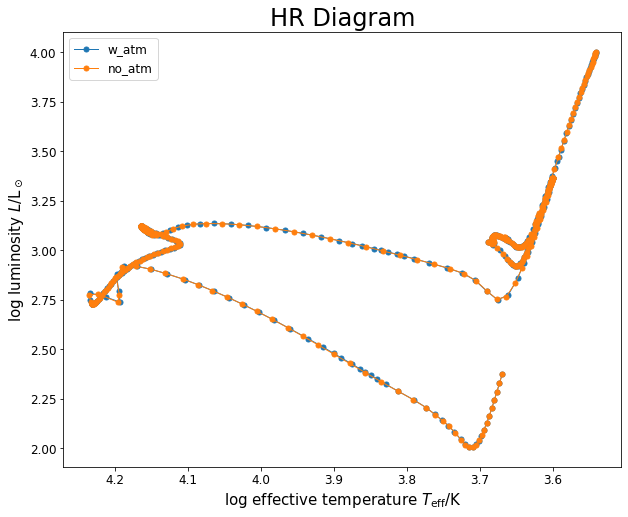

In [13]:
plt.plot(atm_hist['log_Teff'],#[100:], 
         atm_hist['log_L'],#[100:], 
        marker='o', label='w_atm')

plt.plot(no_atm_hist['log_Teff'],#[100:], 
         no_atm_hist['log_L'],#[100:], 
         marker='o', label='no_atm')

plt.gca().invert_xaxis()
plt.xlabel(r'log effective temperature $T_{\rm{eff}}/\rm{K}$')
plt.ylabel(r'log luminosity $L/\rm{L}_\odot$')
# plt.xlim(left=5000)

# plt.xlim(3.7,3.55)
# plt.ylim(2.3,3.5)

plt.legend()
plt.title('HR Diagram', size=24)
plt.show()